In [1]:
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
import json
import requests

from functools import reduce
import yfinance as yf

import datetime as dt
from datetime import datetime, date, time, timedelta
from dateutil.relativedelta import relativedelta

# Import PlotLy Dependencies
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

Stored 'inflation_change_df' (DataFrame)
Average monthly change (%) :-  0.8756453385981057


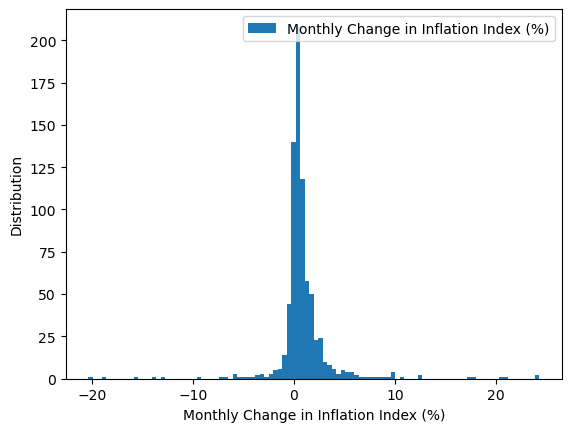

Stored 'productivity_index_monthly_data' (DataFrame)
Average monthly change (%) :-  0.771124838323331


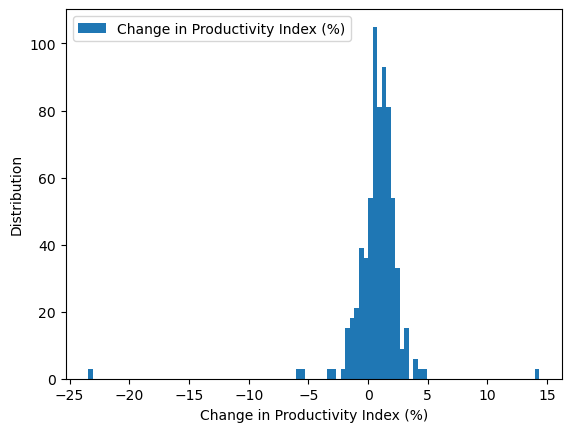

Stored 'gdp_monthly_data' (DataFrame)
Avg. Median Income Change:-  0.6893301036556077
New Datapoint:-  75094.10239130635
Stored 'jobs_index_change_df' (DataFrame)
Average monthly change (%) :-  -0.28359518672663286


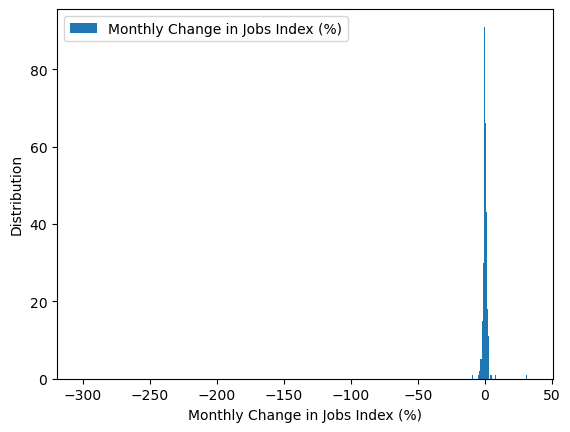

Stored 'housing_monthly_data' (DataFrame)
Average monthly change (%) :-  0.30993484455479475


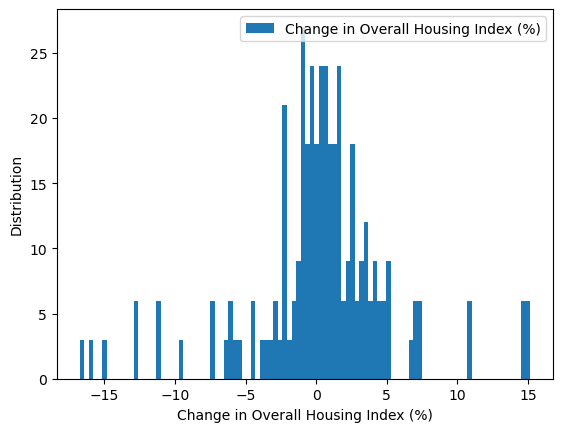

Length of Features List:   431
Length of Labels List:   431
(431, 5) (431,)
Stored 'X' (ndarray)
Stored 'y' (ndarray)
[[-3.18901292e-02  9.81069929e-01 -1.81949422e-01 -5.77940593e-02
  -6.25054009e-03]
 [-9.16869479e-02 -1.80677692e-01 -9.77386637e-01  6.05327484e-02
   4.73361991e-04]
 [-7.24838802e-04  6.73736720e-02  4.92126054e-02  9.95030429e-01
  -5.43399285e-02]]
[0.35295935 0.26286847 0.23826225]
0.8540900704233351
Stored 'X_pca' (ndarray)


C:\Users\deepe\AppData\Local\Temp\ipykernel_19164\785931025.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [2]:
# Run the following Jupyter Notebooks first')

%run x_y_variables.ipynb

### Logisitic Regression

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y, shuffle=True, test_size=0.2)
print(X.shape, y.shape)

(431, 5) (431,)


In [4]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.5930232558139535
Testing Data Score: 0.5632183908045977


In [5]:
# Enter the new independent variables to predict decision
new_data = np.array([[-42.802841, 118.172447, 64.554294, -1.073848, 438.0 ]])
new_data

array([[-42.802841, 118.172447,  64.554294,  -1.073848, 438.      ]])

In [6]:
# Predict the decision of the new data point
predictions = classifier.predict(new_data)
print("Classes are either 0 (Float) or 1 (Lock)")
print(f"The new point was classified as: {predictions}")
print("This means that it is predicting that the Treasury yield will go down and to float. Floating is suggested")

Classes are either 0 (Float) or 1 (Lock)
The new point was classified as: [0]
This means that it is predicting that the Treasury yield will go down and to float. Floating is suggested


In [7]:
from sklearn.metrics import accuracy_score
test_predictions = classifier.predict(X_test)
accuracy_score(y_test, test_predictions)

0.5632183908045977

In [8]:
# Will cross=validation improve resulting scores?
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(classifier, X, y, cv=10)
print("List of cross-validation scores:- " , cv_scores)
print("Mean of scores:- " , cv_scores.mean())

List of cross-validation scores:-  [0.56818182 0.58139535 0.58139535 0.51162791 0.60465116 0.6744186
 0.69767442 0.55813953 0.55813953 0.60465116]
Mean of scores:-  0.5940274841437633
